In [5]:
import numpy as np
%matplotlib inline

In [1]:
#import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import KFold

Using TensorFlow backend.
/Users/spencergordon/anaconda/envs/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
data = np.loadtxt('training_data.txt', skiprows=1)
y = data[:, 0]
X = data[:, 1:]

In [37]:
def build_model(dropout_prob=0.5):
    model = Sequential()
    model.add(Dense(1000, activation='relu', input_dim=(1000)))
    model.add(Dropout(dropout_prob))
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(dropout_prob))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(dropout_prob))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
    
def cross_validate(dropout_prob):
    accuracies = []
    print('Cross-validating with dropout_prob {}'.format(dropout_prob))
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    for ix, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        model = build_model(dropout_prob)
        print('\t\ttraining fold {} with dropout_prob {}: '.format(ix, dropout_prob), end='', flush=True)
        model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=0)
        score = model.evaluate(X_test, y_test, batch_size=64, verbose=0)
        accuracies.append(score[1])
        print('accuracy={}'.format(accuracies[-1]))
    print('\tAverage accuracy of {}'.format(sum(accuracies)/len(accuracies)))

In [25]:
model = build_model(0.5)

In [26]:
model.metrics_names

['loss', 'acc']

In [37]:
for p in np.linspace(0, 1, 10, endpoint=False)[1:]: 
    cross_validate(p)

Cross-validating with dropout_prob 0.1
		training fold 0 with dropout_prob 0.1: accuracy=0.82875
		training fold 1 with dropout_prob 0.1: accuracy=0.83025
		training fold 2 with dropout_prob 0.1: accuracy=0.8295
		training fold 3 with dropout_prob 0.1: accuracy=0.828
		training fold 4 with dropout_prob 0.1: accuracy=0.832
	Average accuracy of 0.8297000000000001
Cross-validating with dropout_prob 0.2
		training fold 0 with dropout_prob 0.2: accuracy=0.83225
		training fold 1 with dropout_prob 0.2: accuracy=0.837
		training fold 2 with dropout_prob 0.2: accuracy=0.8365
		training fold 3 with dropout_prob 0.2: accuracy=0.838
		training fold 4 with dropout_prob 0.2: accuracy=0.82375
	Average accuracy of 0.8335000000000001
Cross-validating with dropout_prob 0.30000000000000004
		training fold 0 with dropout_prob 0.30000000000000004: accuracy=0.83475
		training fold 1 with dropout_prob 0.30000000000000004: accuracy=0.827
		training fold 2 with dropout_prob 0.30000000000000004: accuracy=0.837

Text(0,0.5,'Accuracy')

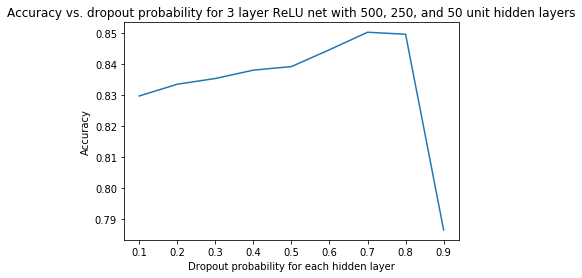

In [7]:
dropout_probs = np.linspace(0, 1, 10, endpoint=False)[1:]
accuracies = [0.8297000000000001, 
              0.8335000000000001, 
              0.83535, 
              0.83805,
              0.8392,
              0.84465, 
              0.8503000000000001,
              0.8496500000000001,
              0.7864]
import matplotlib.pyplot as plt
plt.plot(dropout_probs, accuracies)
plt.title("Accuracy vs. dropout probability for 3 layer ReLU net with 500, 250, and 50 unit hidden layers")
plt.xlabel('Dropout probability for each hidden layer')
plt.ylabel('Accuracy')


In [43]:
model = build_model(0.7)
prev_acc = 0
num_epochs = 0
while True:
    model.fit(X[:19000,:], y[:19000], batch_size=64, epochs=1, verbose=0)
    num_epochs += 1
    score = model.evaluate(X[19000:,:], y[19000:])
    acc = score[1]
    if acc >= .858:
        break
    prev_acc = acc
    print("Num epochs:", num_epochs, "Accuracy:", acc)
print("Num epochs:", num_epochs, "Final Accuracy:", acc)

1000/1000 [==============================] - 0s 381us/step
Num epochs: 1 Accuracy: 0.843
1000/1000 [==============================] - 0s 142us/step
Num epochs: 2 Accuracy: 0.857
1000/1000 [==============================] - 0s 117us/step
Num epochs: 3 Accuracy: 0.855
1000/1000 [==============================] - 0s 161us/step
Num epochs: 4 Accuracy: 0.857
1000/1000 [==============================] - 0s 138us/step
Num epochs: 5 Accuracy: 0.854
1000/1000 [==============================] - 0s 138us/step
Num epochs: 6 Final Accuracy: 0.86


In [6]:
test_data = np.loadtxt('test_data.txt', skiprows=1)

In [44]:
model.fit(X, y, batch_size=64, epochs=6)

Epoch 1/6
20000/20000 [==============================] - 6s 284us/step - loss: 0.3398 - acc: 0.8783
Epoch 2/6
20000/20000 [==============================] - 6s 279us/step - loss: 0.3405 - acc: 0.8806
Epoch 3/6
20000/20000 [==============================] - 5s 274us/step - loss: 0.3337 - acc: 0.8850
Epoch 4/6
20000/20000 [==============================] - 6s 277us/step - loss: 0.3379 - acc: 0.8828
Epoch 5/6
20000/20000 [==============================] - 5s 275us/step - loss: 0.3395 - acc: 0.8845
Epoch 6/6
20000/20000 [==============================] - 6s 276us/step - loss: 0.3373 - acc: 0.8874


In [35]:
#model = build_model(0.7)
#model.fit(X, y, batch_size=64, epochs=20)
pred_y = model.predict(test_data)

Epoch 1/20
20000/20000 [==============================] - 8s 407us/step - loss: 0.5539 - acc: 0.7206
Epoch 2/20
20000/20000 [==============================] - 7s 330us/step - loss: 0.3960 - acc: 0.8460
Epoch 3/20
20000/20000 [==============================] - 7s 339us/step - loss: 0.3673 - acc: 0.8633
Epoch 4/20
20000/20000 [==============================] - 7s 342us/step - loss: 0.3468 - acc: 0.8718
Epoch 5/20
20000/20000 [==============================] - 7s 354us/step - loss: 0.3341 - acc: 0.8777
Epoch 6/20
20000/20000 [==============================] - 7s 349us/step - loss: 0.3328 - acc: 0.8827
Epoch 7/20
20000/20000 [==============================] - 7s 345us/step - loss: 0.3338 - acc: 0.8836
Epoch 8/20
20000/20000 [==============================] - 7s 337us/step - loss: 0.3277 - acc: 0.8869
Epoch 9/20
20000/20000 [==============================] - 7s 330us/step - loss: 0.3249 - acc: 0.8928
Epoch 10/20
20000/20000 [==============================] - 7s 330us/step - loss: 0.3264 - a

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [46]:
output_array = np.column_stack((np.linspace(1, len(pred_y),len(pred_y)),pred_y))
import time
t=time.localtime()
timestamp=time.strftime('%Y%m%d_%H%M%S',t)
filename='submission_'+timestamp+'.txt'
np.savetxt(filename,output_array.round(),fmt='%i',delimiter=',',header='Id,Prediction')

In [24]:
output_array.round()

array([[1.000e+00, 1.000e+00],
       [2.000e+00, 1.000e+00],
       [3.000e+00, 0.000e+00],
       ...,
       [9.998e+03, 0.000e+00],
       [9.999e+03, 1.000e+00],
       [1.000e+04, 0.000e+00]])